# Import data

In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt
import numpy as np

def column_df_to_row(column_df):
    return column_df.to_numpy()[:, 0]
def np_back_to_df(original_df, array):
    return pd.DataFrame(array, index=original_df.index, columns=original_df.columns)
input_path = "past_10_seasons_merged_add.csv"
output_prefix = "past_10_seasons_merged_add_"
main_data = pd.read_csv(input_path) 
label_column = 'ttl_pts'

print("Shape: ", main_data.shape)

main_input = main_data.loc[:, main_data.columns != label_column]
main_output = main_data[[label_column]]

Shape:  (12059, 52)


# Divide into training and testing
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html


In [54]:
init_train, init_test, init_train_label, init_test_label = train_test_split(main_input, main_output, test_size=.3, random_state=42)
print("Training shape: ", init_train.shape)
print("Testing shape: ", init_test.shape)

Training shape:  (8441, 51)
Testing shape:  (3618, 51)


# Describe training data
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.00000,8441.000000,...,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000,8441.000000
mean,43.850586,115.588385,9.963193,16.408236,150.537128,214.137704,1.002969,75.743507,16.19157,0.704644,...,188.542751,41.544755,203.291494,15.398567,16.189219,28.175637,26.060117,86.038443,99.994212,1.083120
std,3.540864,6.331723,1.354667,2.226799,4.406141,6.318994,0.043291,3.818487,3.96403,0.048699,...,6.639421,2.767521,11.065736,1.622950,1.652053,2.084961,1.839038,3.828915,2.381146,0.040875
min,28.170000,80.100000,0.000000,0.000000,120.500000,171.200000,0.790000,55.500000,1.00000,0.140000,...,163.800000,31.500000,152.500000,5.000000,5.000000,17.000000,16.700000,65.000000,87.600000,0.850000
25%,41.590000,111.550000,9.090000,14.930000,147.480000,210.300000,0.970000,73.260000,13.24000,0.680000,...,183.470000,39.700000,195.660000,14.360000,15.150000,26.870000,24.880000,83.500000,98.420000,1.060000
50%,43.650000,115.690000,9.880000,16.260000,150.320000,214.450000,1.000000,75.460000,15.68000,0.710000,...,187.710000,41.420000,202.230000,15.360000,16.160000,28.050000,26.020000,85.890000,100.000000,1.080000
75%,45.870000,119.710000,10.720000,17.740000,153.700000,218.320000,1.030000,77.990000,19.06000,0.730000,...,192.960000,43.160000,210.000000,16.380000,17.200000,29.330000,27.170000,88.370000,101.570000,1.110000
max,63.000000,153.200000,20.000000,34.600000,175.700000,249.050000,1.200000,103.500000,31.00000,1.140000,...,227.000000,61.000000,263.000000,26.000000,26.700000,45.000000,44.400000,111.000000,112.650000,1.260000


,ttl_pts
count,8441.000000
mean,204.546499
std,21.408966
min,134.000000
25%,190.000000
50%,203.000000
75%,218.000000
max,329.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

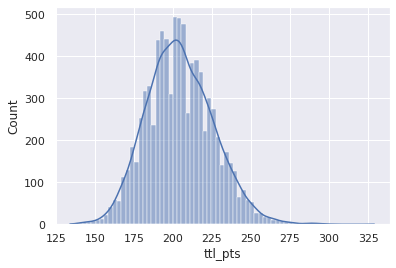

<AxesSubplot:xlabel='ttl_pts'>

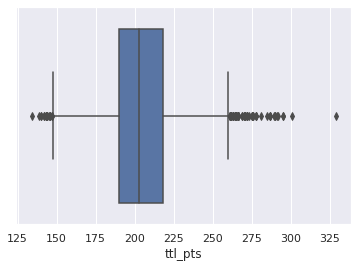

In [55]:
display(init_train.describe())
display(init_train_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

## Removing Outliers

,ttl_pts
count,3618.000000
mean,204.319790
std,20.957209
min,139.000000
25%,190.000000
50%,204.000000
75%,218.000000
max,287.000000


<AxesSubplot:xlabel='ttl_pts', ylabel='Count'>

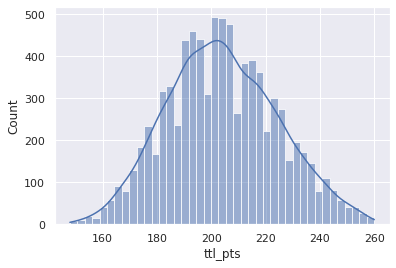

<AxesSubplot:xlabel='ttl_pts'>

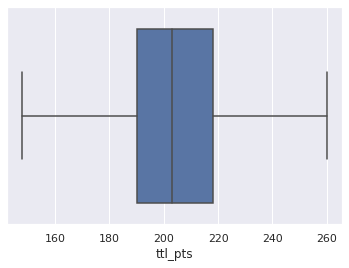

In [56]:
def remove_outliers_by_iqr(data, labels):
    lower = labels.quantile(.25)
    upper = labels.quantile(.75)
    diff = upper - lower
    
    lower_bound = lower - 1.5 * diff
    upper_bound = upper + 1.5 * diff
    valid = (labels >= lower_bound) & (labels <= upper_bound)
    rows_to_select = valid.to_numpy()[:, 0]
    input, labels = data.loc[rows_to_select], labels.loc[rows_to_select]
    input.sort_index(axis=0)
    labels.sort_index(axis=0)
    return input, labels

init_train, init_train_label = remove_outliers_by_iqr(init_train, init_train_label)
display(init_test_label.describe())
display(sns.histplot(init_train_label, x="ttl_pts", kde=True))
plt.show()
display(sns.boxplot(x="ttl_pts", data=init_train_label))

# Standardize data
https://scikit-learn.org/stable/modules/preprocessing.html

Then describe training data again

In [57]:
def scale_dataframe(df):
    scaled_values = preprocessing.scale(df)
    return np_back_to_df(df, scaled_values)
scaled_train = scale_dataframe(init_train)
scaled_test = scale_dataframe(init_test)

display(scaled_train.describe())
display(scaled_train.head())

,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
count,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,...,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03,8.350000e+03
mean,-1.096874e-15,6.929919e-16,-1.041562e-15,-1.472568e-15,1.768698e-15,2.909396e-15,2.736228e-15,-2.788561e-15,6.926728e-16,-1.923146e-15,...,1.357690e-15,1.905276e-15,-1.574469e-15,3.435708e-17,-7.611742e-16,1.727427e-16,-4.865303e-16,1.305995e-15,5.291310e-15,-4.174013e-15
std,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,...,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00,1.000060e+00
min,-4.445537e+00,-5.607338e+00,-7.361501e+00,-7.377263e+00,-6.822891e+00,-6.848190e+00,-4.936533e+00,-5.357131e+00,-3.844113e+00,-1.158523e+01,...,-3.746689e+00,-3.632664e+00,-4.636256e+00,-6.403342e+00,-6.776450e+00,-5.360122e+00,-5.102081e+00,-5.511991e+00,-5.217218e+00,-5.718513e+00
25%,-6.377616e-01,-6.396976e-01,-6.444668e-01,-6.631595e-01,-6.952528e-01,-6.097297e-01,-7.599774e-01,-6.489957e-01,-7.458141e-01,-5.050113e-01,...,-7.634309e-01,-6.649936e-01,-6.899416e-01,-6.380971e-01,-6.259968e-01,-6.268623e-01,-6.416039e-01,-6.637420e-01,-6.639408e-01,-5.639055e-01
50%,-5.708289e-02,1.464641e-02,-6.069813e-02,-6.505112e-02,-4.999913e-02,5.115121e-02,-6.388490e-02,-7.373367e-02,-1.271685e-01,1.105565e-01,...,-1.253535e-01,-4.612567e-02,-9.469001e-02,-2.385615e-02,-2.063732e-02,-6.098112e-02,-2.617787e-02,-3.837299e-02,9.555396e-04,-7.299053e-02
75%,5.739970e-01,6.531850e-01,5.600179e-01,6.005131e-01,7.133996e-01,6.673348e-01,6.322076e-01,5.883479e-01,7.196661e-01,5.209349e-01,...,6.583967e-01,5.835995e-01,6.094129e-01,6.042399e-01,6.089366e-01,5.528561e-01,6.055869e-01,6.132169e-01,6.616437e-01,6.633819e-01
max,5.444457e+00,5.946417e+00,7.417452e+00,8.182549e+00,5.718660e+00,4.429886e+00,4.576732e+00,4.379908e+00,3.762185e+00,8.933694e+00,...,5.843439e+00,7.043712e+00,4.373699e+00,6.528048e+00,6.359852e+00,8.067566e+00,9.984027e+00,6.549634e+00,5.324334e+00,4.345244e+00


,ast,ast_pct,blk,blk_pct,def_reb_pct,def_rtg,efg,fg,fg3,fg3_pct,...,pace,pf,pts,stl,stl_pct,to,to_pct,trb,trb_pct,ts_pct
3842,-0.035787,0.343399,-0.001582,-0.190969,-0.611188,-1.249858,-0.295916,-0.421012,-0.309720,0.110556,...,-0.409871,-0.737376,-0.169697,1.589489,1.771227,1.118737,1.041287,0.251368,1.141379,0.172467
3708,0.188534,1.359687,0.072312,-0.321383,-0.327186,-1.039143,-0.527947,-1.160634,-1.308680,-1.325768,...,-0.860546,-0.599850,-1.103622,0.259403,0.608937,0.385010,0.916023,-0.792225,-0.171581,-0.318448
2413,0.091991,0.243825,-0.792256,-0.937480,-0.622548,0.389573,0.864238,-0.126753,-0.565798,0.520935,...,-1.051742,-0.140223,-0.281292,-0.713530,-0.383853,-1.116014,-0.647050,-1.437259,-0.739688,0.908839
4382,0.421374,0.569416,0.944271,0.375660,-1.083768,-0.343142,-0.527947,0.024352,-0.393389,0.520935,...,-0.065415,-0.180033,-0.352640,-0.042330,-0.014584,0.394601,0.316936,0.626327,-0.213663,-1.054820
8846,0.583225,0.261211,-0.740530,-0.105525,1.619936,-0.264922,0.400177,0.681795,-0.005468,0.110556,...,0.031700,-1.432245,0.029711,-0.177801,-0.171977,-1.715464,-1.687284,0.455891,0.388110,-0.318448


# Correlation Heatmap
https://seaborn.pydata.org/generated/seaborn.heatmap.html

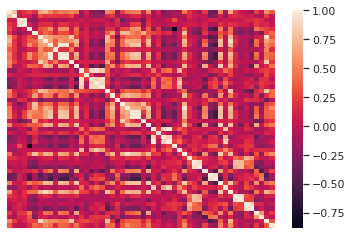

In [58]:
def plot_correlation_heatmap(input, labels, ax=None, annot=False, ticks='auto' ):
    merged = pd.concat([input, init_train_label], axis=1)
    sns.heatmap(merged.corr(method='pearson'), ax=ax, annot=annot, xticklabels=ticks, yticklabels=ticks)
plot_correlation_heatmap(scaled_train, init_train_label, ticks=False)

# Feature selection
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html#sklearn.feature_selection.SelectKBest

,ast,def_rtg,efg,fg,fg3,fg3a,fg3a_per_fga_pct,fga,off_rtg,opp_ast,opp_efg_pct,opp_fg,opp_fg3,opp_fg3a,opp_fga,opp_pts,opp_trb,pace,pts,ts_pct
3842,-0.035787,-1.249858,-0.295916,-0.421012,-0.309720,-0.372776,-0.232210,-0.088394,0.081862,-0.521568,-0.341384,-0.409248,-0.544273,-0.568621,-0.206126,-0.875166,-0.959722,-0.409871,-0.169697,0.172467
3708,0.188534,-1.039143,-0.527947,-1.160634,-1.308680,-1.145684,-1.314166,-1.456055,-0.906022,-0.727268,-1.104721,-0.882805,-1.020802,-0.960179,-0.674527,-1.171496,-0.823680,-0.860546,-1.103622,-0.318448
2413,0.091991,0.389573,0.864238,-0.126753,-0.565798,-0.756847,-0.502699,-0.930771,0.544056,0.055018,0.676399,-0.130376,-0.658529,-0.763359,-0.709965,-0.383163,-0.693079,-1.051742,-0.281292,0.908839
4382,0.421374,-0.343142,-0.527947,0.024352,-0.393389,-0.647249,-0.773188,0.449702,-0.554577,0.943272,-1.104721,-0.085651,-0.480178,-0.422828,0.382458,-0.222298,0.885010,-0.065415,-0.352640,-1.054820
8846,0.583225,-0.264922,0.400177,0.681795,-0.005468,0.078008,-0.142047,0.518565,0.135022,0.778088,-0.595830,-0.440819,0.581562,0.800791,-0.011985,-0.211950,0.087803,0.031700,0.029711,-0.318448


,ast,def_rtg,efg,fg,fg3,fg3a,fg3a_per_fga_pct,fga,off_rtg,opp_ast,opp_efg_pct,opp_fg,opp_fg3,opp_fg3a,opp_fga,opp_pts,pace,pts,trb,ts_pct
3842,-0.035787,-1.249858,-0.295916,-0.421012,-0.309720,-0.372776,-0.232210,-0.088394,0.081862,-0.521568,-0.341384,-0.409248,-0.544273,-0.568621,-0.206126,-0.875166,-0.409871,-0.169697,0.251368,0.172467
3708,0.188534,-1.039143,-0.527947,-1.160634,-1.308680,-1.145684,-1.314166,-1.456055,-0.906022,-0.727268,-1.104721,-0.882805,-1.020802,-0.960179,-0.674527,-1.171496,-0.860546,-1.103622,-0.792225,-0.318448
2413,0.091991,0.389573,0.864238,-0.126753,-0.565798,-0.756847,-0.502699,-0.930771,0.544056,0.055018,0.676399,-0.130376,-0.658529,-0.763359,-0.709965,-0.383163,-1.051742,-0.281292,-1.437259,0.908839
4382,0.421374,-0.343142,-0.527947,0.024352,-0.393389,-0.647249,-0.773188,0.449702,-0.554577,0.943272,-1.104721,-0.085651,-0.480178,-0.422828,0.382458,-0.222298,-0.065415,-0.352640,0.626327,-1.054820
8846,0.583225,-0.264922,0.400177,0.681795,-0.005468,0.078008,-0.142047,0.518565,0.135022,0.778088,-0.595830,-0.440819,0.581562,0.800791,-0.011985,-0.211950,0.031700,0.029711,0.455891,-0.318448


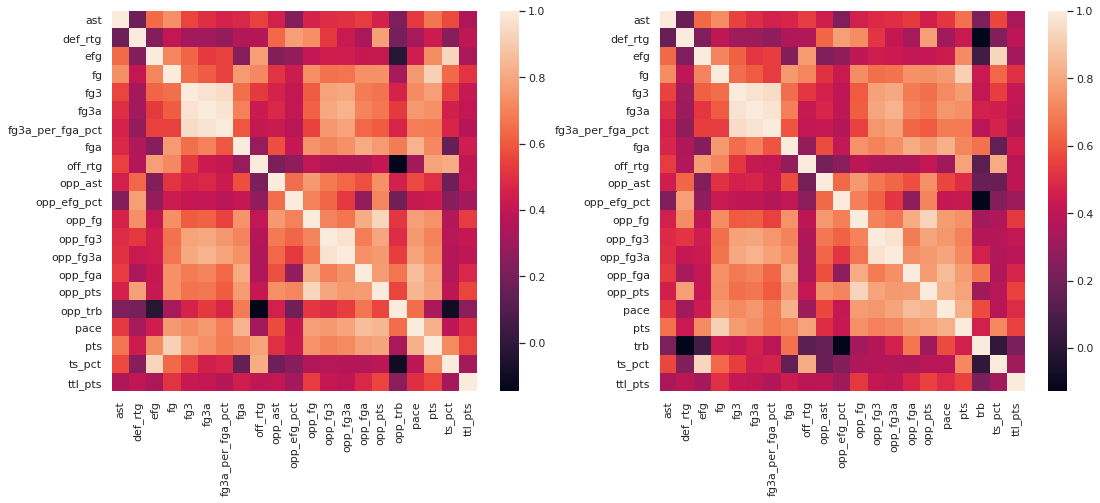

In [59]:
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression

def select_features(input, labels, method, k=20, ax=None):
    selector = SelectKBest(method, k=k)
    selector.fit(input, column_df_to_row(labels))
    selected = input.loc[:, selector.get_support()]
    display(selected.head())
    plot_correlation_heatmap(selected, labels, ax=ax)
    return selected
figure = plt.figure(figsize = (18,7))
ax1, ax2 = figure.subplots(1,2)
f_regression_select = select_features(scaled_train, init_train_label, f_regression, k=20, ax=ax1)
mutual_info_regression_select = select_features(scaled_train, init_train_label, mutual_info_regression, k=20, ax=ax2)

In [60]:
f_regression_columns = set(f_regression_select.columns)
mutual_info_columns = set(mutual_info_regression_select.columns)
display(f"Column diff {(f_regression_columns - mutual_info_columns) | (mutual_info_columns - f_regression_columns)}")

"Column diff {'opp_trb', 'trb'}"

## Removing redundant features
- Removing ft, ft_rt, fta (in favor of only fa_per_fga_pct)
- Removing orb in favor of only orb_pct)
- Removing stl (in favor of stl_pct)
- Removing opp_fg3a (in favor of opp_fg3)
- Removing opp_tov (in favor of opp_tov_pct)

Columns before removal: {'opp_fg', 'fga', 'pace', 'opp_fg3', 'opp_efg_pct', 'ts_pct', 'opp_trb', 'fg', 'opp_ast', 'opp_pts', 'pts', 'fg3a', 'opp_fg3a', 'opp_fga', 'ast', 'fg3a_per_fga_pct', 'def_rtg', 'efg', 'fg3', 'off_rtg'}
Columns after removal: {'opp_fg', 'fga', 'pace', 'opp_fg3', 'opp_efg_pct', 'ts_pct', 'opp_trb', 'fg', 'opp_ast', 'opp_pts', 'pts', 'fg3a', 'opp_fga', 'ast', 'fg3a_per_fga_pct', 'def_rtg', 'efg', 'fg3', 'off_rtg'}


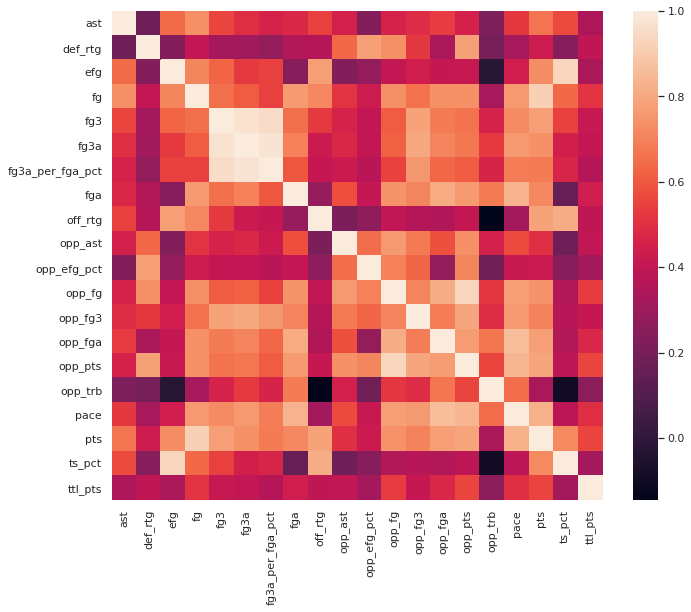

In [61]:
print(f"Columns before removal: {set(f_regression_select.columns)}")
columns_to_drop = ['ft', 'ft_rt', 'fta', 'orb_pct', 'stl', 'opp_fg3a', 'opp_tov', 'trb', 'to']
def attempt_to_drop_columns(df, columns):
    for column in columns:
        try:
            df = df.drop(labels=[column], axis=1)
        except KeyError as error:
            continue
    return df

f_regression_select = attempt_to_drop_columns(f_regression_select, columns_to_drop)
print(f"Columns after removal: {set(f_regression_select.columns)}")
figure = plt.figure(figsize = (11,9))
plot_correlation_heatmap(f_regression_select, init_train_label, ax=figure.gca())

# Keeping the final features
test_select = scaled_test[f_regression_select.columns]

## Looking at the relationship between some features and our target label

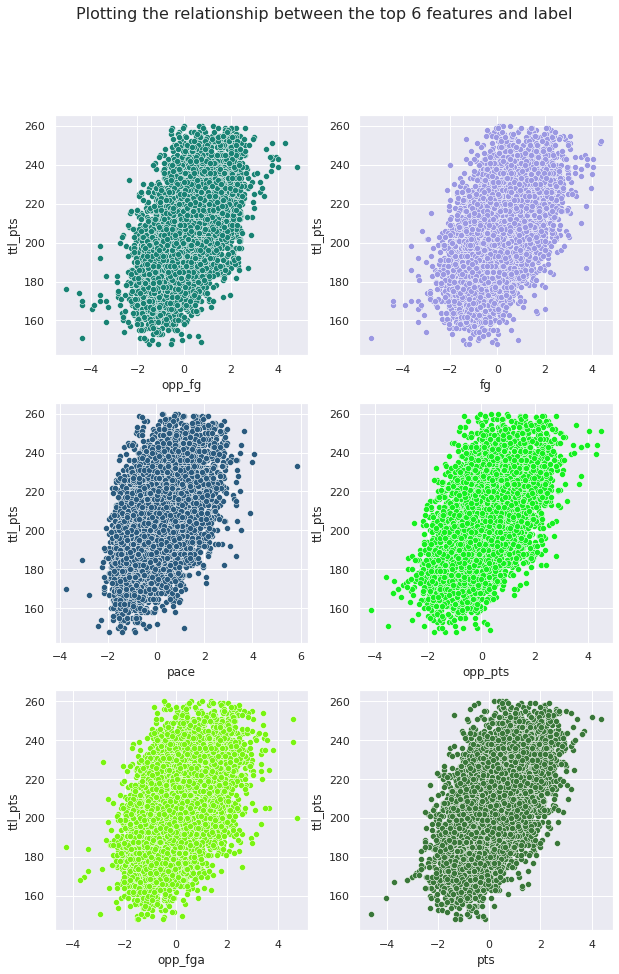

In [62]:
k = 6
selector = SelectKBest(f_regression, k=k)
selector.fit(f_regression_select, column_df_to_row(init_train_label))
features_to_view = f_regression_select.loc[:, selector.get_support()]
fig, axs = plt.subplots(k // 2, 2, figsize=(10, 15))
row_index = 0
column_index = 0
for column in set(features_to_view.columns):
    x = features_to_view[column]
    sns.scatterplot(x=x, y=init_train_label['ttl_pts'], ax = axs[row_index, column_index], color=np.random.rand(3))
    column_index = column_index + 1
    if column_index == 2:
        column_index = 0
        row_index = row_index + 1
fig.suptitle(f"Plotting the relationship between the top {k} features and label", fontsize=16)
plt.show()


# Dimensionality Reduction with PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

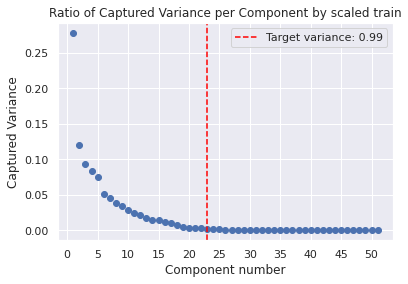

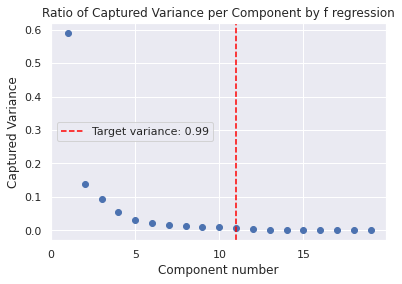

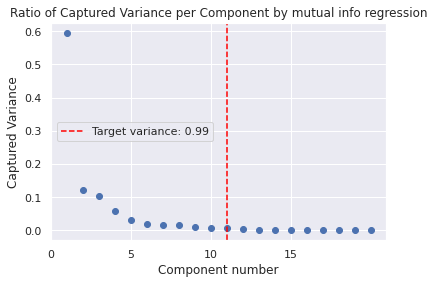

In [63]:
from sklearn.decomposition import PCA

def pca_scree_plot(X, label, max_components=100, target_variance=None):
    max_components = min(X.shape[1], max_components)
    pca = PCA(n_components=max_components)
    pca.fit(X)
    component_numbers = np.arange(1, max_components + 1)
    
    explained_variance = 0
    component_number = -1
    while target_variance and explained_variance < target_variance:
        component_number += 1
        explained_variance += pca.explained_variance_ratio_[component_number]
    
    plt.scatter(component_numbers, pca.explained_variance_ratio_)
    plt.xticks(range(0, max_components, 5))
    if target_variance:
        plt.axvline(x=component_number, linestyle='--', color='red', label=f"Target variance: {target_variance}")
    plt.xlabel('Component number')
    plt.ylabel('Captured Variance')
    plt.legend()
    plt.title(f"Ratio of Captured Variance per Component by {label}")
max_components = 20
pca_scree_plot(scaled_train, max_components = 100, label='scaled train', target_variance=.99)
plt.show()
pca_scree_plot(f_regression_select, max_components = max_components, label='f regression', target_variance=.99)
plt.show()
pca_scree_plot(mutual_info_regression_select, max_components = max_components, label='mutual info regression', target_variance=.99)



## Apply PCA and Export
Apply PCA of only 10 components to train and test

In [64]:
def export_dataset(name, input, labels):
    if input.shape[0] != labels.shape[0]:
        raise ValueError(f'Trying to merge incompatible datsets: {input.shape} ; {labels.shape}')
    output = pd.concat([input, labels], axis=1)
    if output.shape[0] != input.shape[0]:
        raise ValueError(f'An error occurred while merging the datasets')
    output.to_csv(path_or_buf=f'output-datasets/{output_prefix}{name}.csv', index=False)
    

pca = PCA(n_components=10)
pca.fit(f_regression_select)

train_pca = pd.DataFrame(data=pca.transform(f_regression_select), index=f_regression_select.index)
test_pca = pd.DataFrame(data=pca.transform(test_select), index=test_select.index)

# # scaled datsets
export_dataset('scaled-train', scaled_train, init_train_label)
export_dataset('scaled-test', scaled_test, init_test_label)

# features selected datsets
export_dataset('feature-selected-train', f_regression_select, init_train_label)
export_dataset('feature-selected-test', test_select, init_test_label)

# pca datasets
export_dataset('pca-train', train_pca, init_train_label)
export_dataset('pca-test', test_pca, init_test_label)



# Run DBScan and KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html

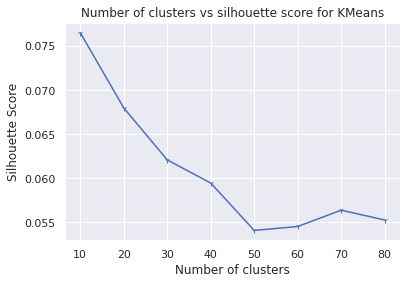

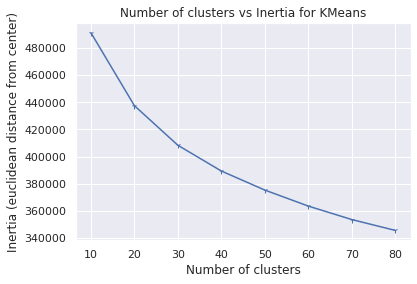

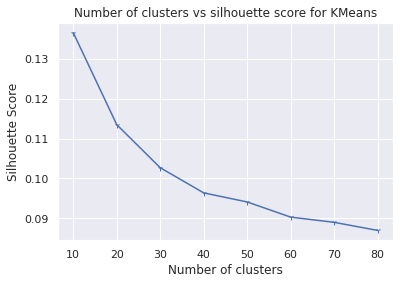

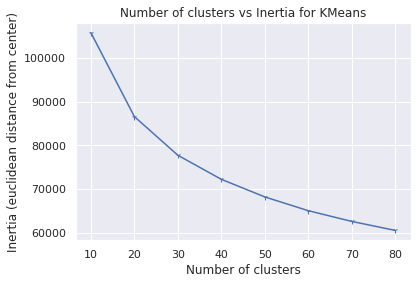

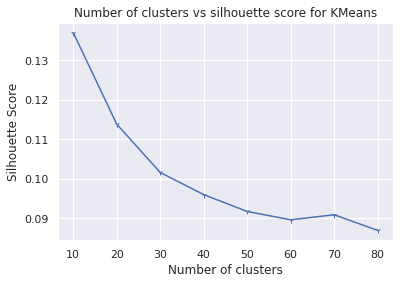

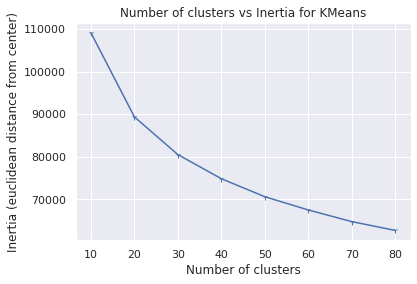

In [13]:
from sklearn.cluster import OPTICS, KMeans
from sklearn.metrics import silhouette_score

datasets = [("scaled train", scaled_train), 
            ("f regression", f_regression_select), 
            ("mutual information regression", mutual_info_regression_select)]
clusters = range(10, 81, 10)
for dataset_name, dataset in datasets:
    scores = []
    inertia = []
    for number_of_clusters in clusters:
        kmeans = KMeans(n_clusters=number_of_clusters)
        labels = kmeans.fit_predict(dataset)
        inertia.append(kmeans.inertia_)
        scores.append(silhouette_score(dataset, labels))
    plt.plot(clusters, scores, marker='1')
    plt.title(f"Number of clusters vs silhouette score for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Silhouette Score")
    plt.show()
    plt.plot(clusters, inertia, marker='1')
    plt.title(f"Number of clusters vs Inertia for KMeans")
    plt.xlabel("Number of clusters")
    plt.ylabel("Inertia (euclidean distance from center)")
    plt.show()
    
        

# Clustering Evaluation
## KMeans
A silhouette score close to 1 is best--they are within the range of \[-1, 1\]. All of the clustering has low silhouette scores, suggesting the clustering is poor. Inertia (loss) starts leveling off, suggesting add more clusters won't improve clustering.